In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib

In [2]:
df = pd.read_csv("F:\SHREY'S\INTERNSHIP SHREY\TASK 1\drug200.csv")  # Ensure the correct file path


<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\shrey\AppData\Local\Temp\ipykernel_7472\1260171655.py:1: SyntaxWarning: invalid escape sequence '\S'
  df = pd.read_csv("F:\SHREY'S\INTERNSHIP SHREY\TASK 1\drug200.csv")  # Ensure the correct file path


In [3]:
print("\nDataset Preview:\n", df.head())



Dataset Preview:
    Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  drugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  drugY


In [4]:
# Check for missing values
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64


In [20]:

print("\nDataset Summary:\n", df.describe())


Dataset Summary:
               Age     Na_to_K
count  200.000000  200.000000
mean    44.315000   16.084485
std     16.544315    7.223956
min     15.000000    6.269000
25%     31.000000   10.445500
50%     45.000000   13.936500
75%     58.000000   19.380000
max     74.000000   38.247000


C:\Users\shrey\AppData\Local\Temp\ipykernel_7472\721597444.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Drug"], palette="viridis")


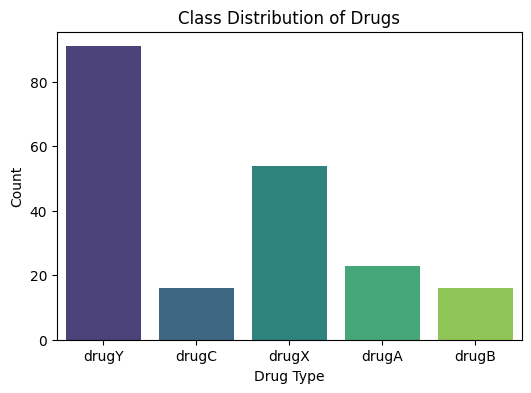

In [21]:
# Plot class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=df["Drug"], palette="viridis")
plt.title("Class Distribution of Drugs")
plt.xlabel("Drug Type")
plt.ylabel("Count")
plt.show()

In [5]:
# Define features and target variable
X = df.drop(columns=["Drug"])  # Features
y = df["Drug"]  # Target variable

In [6]:
# Identify categorical and numerical columns
categorical_cols = ["Sex", "BP", "Cholesterol"]
numerical_cols = ["Age", "Na_to_K"]

In [7]:
# Preprocessing: One-Hot Encoding for categorical and Standard Scaling for numerical
preprocessor = ColumnTransformer([
    ("onehot", OneHotEncoder(drop="first"), categorical_cols),
    ("scaler", StandardScaler(), numerical_cols)
])

In [8]:
# Initialize Decision Tree model
model = DecisionTreeClassifier(random_state=42)

In [9]:
# Create pipeline with preprocessing and model
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", model)
])

In [10]:
# Define hyperparameters for tuning
param_grid = {
    "classifier__criterion": ["gini", "entropy"],
    "classifier__max_depth": range(3, 10)
}

In [11]:
# Perform Grid Search for best hyperparameters
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Sex',
                                                                          'BP',
                                                                          'Cholesterol']),
                                                                        ('scaler',
                                                                         StandardScaler(),
                                                                         ['Age',
                                                                          'Na_to_K'])])),
                                       ('classifier',
                                        DecisionTreeClassifier(random_state=42))]),
             param_grid={'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_depth': range(3, 10)},
             scoring='accuracy')

In [12]:
# Best model
best_model = grid_search.best_estimator_

In [13]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Train the best model
best_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Sex', 'BP', 'Cholesterol']),
                                                 ('scaler', StandardScaler(),
                                                  ['Age', 'Na_to_K'])])),
                ('classifier',
                 DecisionTreeClassifier(max_depth=4, random_state=42))])

In [15]:
# Predictions
y_pred = best_model.predict(X_test)

In [16]:
# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f'\n Accuracy: {accuracy:.3f}')
print("\n Classification Report:\n", classification_report(y_test, y_pred))


 Accuracy: 1.000

 Classification Report:
               precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         5
       drugX       1.00      1.00      1.00        11
       drugY       1.00      1.00      1.00        15

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



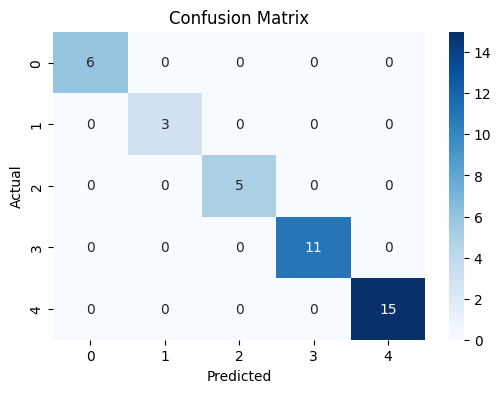

In [17]:
# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [18]:
# Save the trained model
joblib.dump(best_model, "optimized_decision_tree.pkl")

['optimized_decision_tree.pkl']

In [25]:
# Ensure correct feature names after encoding
if hasattr(model, "feature_importances_"):
    feature_importances = pd.Series(model.feature_importances_, index=X.columns)
    feature_importances.sort_values(ascending=False).plot(kind='bar', color='teal')
    plt.title("Feature Importance in Decision Tree")
    plt.xlabel("Feature")
    plt.ylabel("Importance Score")
    plt.show()
else:
    print("⚠ Model does not have feature_importances_ attribute. Check training process!")


⚠ Model does not have feature_importances_ attribute. Check training process!
